# Тема проекта "Анализ факторов, влияющих на зарплату игроков НБА в датасете NBA 2k20"

# Описание проекта

Проект направлен на изучение зарплат игроков НБА, используя данные из датасета NBA 2k20. Зарплата является одним из ключевых аспектов в управлении командами и оценке игроков. Понимание факторов, влияющих на уровень зарплаты, может помочь командам в принятии стратегических решений. Проект предоставит полезные инсайды для менеджеров команд НБА и станет основой для последующих исследований в данной области.

# Цели проекта

#### Ознакомление со спецификой деятельности по избранному направлению подготовки; формирование практических профессиональных умений, приобретение первоначального практического опыта.

1. Изучить распределение зарплат игроков НБА и выявить основные статистические характеристики.2. 
Оценить влияние таких факторов, как рейтинг, рост, веc и т.к. на уровень зарплаты.
3. 
Провести сравнительный анализ зарплат по всем командам и позициям игроков.

# Задачи проекта

#### Приобретение первичных профессиональных навыков, практического опыта, навыков самостоятельной работы, закрепление, систематизация и расширение теоретических знаний по технологии программирования для решения конкретных прикладных задач в рамках выполнения индивидуального задания.

1. Собрать и визуализировать данные о зарплатах игроков.
2. Провести анализ между зарплатами и другими переменными.
3. Сделать выводы и рекомендации для команд и менеджеров относительно управления зарплатами и составом.

# Предобработка данных

## 1. Загрузка файла с данными и изучение общей информации

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime

In [5]:
df = pd.read_csv('nba2k-full.csv')

In [41]:
df

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
0,lebron james,97,los angeles lakers,f,1984-12-30,2.06,113.4,37436858.0,usa,1,не указано
1,kawhi leonard,97,los angeles clippers,f,1991-06-29,2.01,102.1,32742000.0,usa,15,san diego state
2,giannis antetokounmpo,96,milwaukee bucks,f-g,1994-12-06,2.11,109.8,25842697.0,greece,15,не указано
3,kevin durant,96,brooklyn nets,f,1988-09-29,2.08,104.3,37199000.0,usa,2,texas
4,james harden,96,houston rockets,g,1989-08-26,1.96,99.8,38199000.0,usa,3,arizona state
...,...,...,...,...,...,...,...,...,...,...,...
424,brandon goodwin,68,atlanta hawks,g,1995-10-02,1.83,81.6,522738.0,usa,undrafted,florida gulf coast
425,michael frazier,68,houston rockets,g,1994-03-08,1.91,90.7,79568.0,usa,60,florida
426,kostas antetokounmpo,68,los angeles lakers,f,1997-11-20,2.08,90.7,79568.0,greece,undrafted,dayton
427,jalen lecque,68,phoenix suns,g,2000-06-13,1.91,86.2,898310.0,usa,undrafted,не указано


### 1.1 Первые строки

In [7]:
df.head(5)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


### 1.2 Последние строки

In [8]:
df.tail(5)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
459,Chris Paul,88,#3,Oklahoma City Thunder,G,05/06/85,6-1 / 1.85,175 lbs. / 79.4 kg.,$41358814,USA,2005,1,4,Wake Forest,NBA2k21
460,Bradley Beal,88,#3,Washington Wizards,G,06/28/93,6-3 / 1.91,207 lbs. / 93.9 kg.,$28751774,USA,2012,1,3,Florida,NBA2k21
461,Rudy Gobert,87,#27,Utah Jazz,C,06/26/92,7-1 / 2.16,238 lbs. / 108 kg.,$27525281,France,2013,1,27,NaN,NBA2k21
462,Kyle Lowry,87,#7,Toronto Raptors,G,03/25/86,6-0 / 1.83,205 lbs. / 93 kg.,$30500000,USA,2006,1,24,Villanova,NBA2k21
463,Kristaps Porzingis,87,#6,Dallas Mavericks,F-C,08/02/95,7-3 / 2.21,220 lbs. / 99.8 kg.,$29467800,Latvia,2015,1,4,NaN,NBA2k21


### 1.3 Случайные строки

In [9]:
df.sample(5)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
282,Tyson Chandler,73,#19,Houston Rockets,C,10/02/82,7-0 / 2.13,235 lbs. / 106.6 kg.,$2564753,USA,2001,1,2,NaN,NBA2k20
371,Dzanan Musa,71,#13,Brooklyn Nets,F,05/08/99,6-9 / 2.06,195 lbs. / 88.5 kg.,$1911600,Bosnia and Herzegovina,2018,1,29,NaN,NBA2k20
63,Marc Gasol,82,#33,Toronto Raptors,C,01/29/85,6-11 / 2.11,265 lbs. / 120.2 kg.,$25595700,Spain,2007,2,48,NaN,NBA2k20
111,Thaddeus Young,79,#21,Chicago Bulls,F,06/21/88,6-8 / 2.03,220 lbs. / 99.8 kg.,$12900000,USA,2007,1,12,Georgia Tech,NBA2k20
140,Mo Bamba,77,#5,Orlando Magic,C,05/12/98,7-0 / 2.13,225 lbs. / 102.1 kg.,$5697600,USA,2018,1,6,Texas,NBA2k20


## 1.4 Изучение общей информации

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         441 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      388 non-null    object
 14  version      464 non-null    object
dtypes: int64(2), object(13)
memory usage: 54.5+ KB
None


### Описание столбцов

#### 1. **full_name**: Полное имя игрока
#### 2. **rating**: Рейтинг игрока
#### 3. **jersey**: Номер майки игрока 
#### 4. **team**: Команда, в которой играет игрок 
#### 5. **position**: Позиция игрока 
#### 6. **b_day**: Дата рождения игрока 
#### 7. **height**: Рост игрока 
#### 8. **weight**: Вес игрока 
#### 9. **salary**: Зарплата игрока 
#### 10. **country**: Страна, из которой игрок 
#### 11. **draft_year**: Год драфта
#### 12. **draft_round**: Раунд драфта 
#### 13. **draft_peak**: Пик драфта 
#### 14. **college**: Колледж, в котором учился игрок
#### 15. **version**: Версия игры

### **Выводы**

1. В датафрейме 464 записи, 15 столбцов.
2. В двух столбцах есть пропущенные значения.
3. Нарушений в записи столбцов нет, но необходимо привести весь текст к нижнему регистру.
4. Для удобства анализа возможно изменить тип данных столбцов: salary, height, weight, b_day
5. Так как столбцы  jersey, draft_year, draft_round, version не имеют отношения к анализу зарплат игроков, их можно удалить.

## 2. Удаление ненужных столбцов

In [11]:
df.drop(columns=['jersey', 'draft_year', 'draft_round', 'version'], inplace=True)

In [12]:
df

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
0,LeBron James,97,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,1,NaN
1,Kawhi Leonard,97,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,15,San Diego State
2,Giannis Antetokounmpo,96,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,15,NaN
3,Kevin Durant,96,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2,Texas
4,James Harden,96,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,3,Arizona State
...,...,...,...,...,...,...,...,...,...,...,...
459,Chris Paul,88,Oklahoma City Thunder,G,05/06/85,6-1 / 1.85,175 lbs. / 79.4 kg.,$41358814,USA,4,Wake Forest
460,Bradley Beal,88,Washington Wizards,G,06/28/93,6-3 / 1.91,207 lbs. / 93.9 kg.,$28751774,USA,3,Florida
461,Rudy Gobert,87,Utah Jazz,C,06/26/92,7-1 / 2.16,238 lbs. / 108 kg.,$27525281,France,27,NaN
462,Kyle Lowry,87,Toronto Raptors,G,03/25/86,6-0 / 1.83,205 lbs. / 93 kg.,$30500000,USA,24,Villanova


## 3. Изучение пропущенных значений и проверка соотвествию 'змеиному регистру'.

#### 3.1 Изменение всех значений в DataFrame к нижнему регистру

In [13]:
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)

In [14]:
df

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
0,lebron james,97,los angeles lakers,f,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,usa,1,NaN
1,kawhi leonard,97,los angeles clippers,f,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,usa,15,san diego state
2,giannis antetokounmpo,96,milwaukee bucks,f-g,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,greece,15,NaN
3,kevin durant,96,brooklyn nets,f,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,usa,2,texas
4,james harden,96,houston rockets,g,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,usa,3,arizona state
...,...,...,...,...,...,...,...,...,...,...,...
459,chris paul,88,oklahoma city thunder,g,05/06/85,6-1 / 1.85,175 lbs. / 79.4 kg.,$41358814,usa,4,wake forest
460,bradley beal,88,washington wizards,g,06/28/93,6-3 / 1.91,207 lbs. / 93.9 kg.,$28751774,usa,3,florida
461,rudy gobert,87,utah jazz,c,06/26/92,7-1 / 2.16,238 lbs. / 108 kg.,$27525281,france,27,NaN
462,kyle lowry,87,toronto raptors,g,03/25/86,6-0 / 1.83,205 lbs. / 93 kg.,$30500000,usa,24,villanova


#### 3.2 Анализ и заполнение пропущенных значений

In [15]:
df.isna().sum()

full_name      0
rating         0
team          23
position       0
b_day          0
height         0
weight         0
salary         0
country        0
draft_peak     0
college       76
dtype: int64

Пропуски в столбце team возникают из-за того, что игрок на данный момент не состоит не в одной команде, по причине окончания договора т.е. он является свободным агентом.

In [16]:
df['team'].fillna('свободный агент', inplace=True)
df

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
0,lebron james,97,los angeles lakers,f,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,usa,1,NaN
1,kawhi leonard,97,los angeles clippers,f,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,usa,15,san diego state
2,giannis antetokounmpo,96,milwaukee bucks,f-g,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,greece,15,NaN
3,kevin durant,96,brooklyn nets,f,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,usa,2,texas
4,james harden,96,houston rockets,g,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,usa,3,arizona state
...,...,...,...,...,...,...,...,...,...,...,...
459,chris paul,88,oklahoma city thunder,g,05/06/85,6-1 / 1.85,175 lbs. / 79.4 kg.,$41358814,usa,4,wake forest
460,bradley beal,88,washington wizards,g,06/28/93,6-3 / 1.91,207 lbs. / 93.9 kg.,$28751774,usa,3,florida
461,rudy gobert,87,utah jazz,c,06/26/92,7-1 / 2.16,238 lbs. / 108 kg.,$27525281,france,27,NaN
462,kyle lowry,87,toronto raptors,g,03/25/86,6-0 / 1.83,205 lbs. / 93 kg.,$30500000,usa,24,villanova


Пропуски в столбце college возникают по причине отсутствия информации место учебы игрока.

In [17]:
df['college'].fillna('не указано', inplace=True)
df

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
0,lebron james,97,los angeles lakers,f,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,usa,1,не указано
1,kawhi leonard,97,los angeles clippers,f,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,usa,15,san diego state
2,giannis antetokounmpo,96,milwaukee bucks,f-g,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,greece,15,не указано
3,kevin durant,96,brooklyn nets,f,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,usa,2,texas
4,james harden,96,houston rockets,g,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,usa,3,arizona state
...,...,...,...,...,...,...,...,...,...,...,...
459,chris paul,88,oklahoma city thunder,g,05/06/85,6-1 / 1.85,175 lbs. / 79.4 kg.,$41358814,usa,4,wake forest
460,bradley beal,88,washington wizards,g,06/28/93,6-3 / 1.91,207 lbs. / 93.9 kg.,$28751774,usa,3,florida
461,rudy gobert,87,utah jazz,c,06/26/92,7-1 / 2.16,238 lbs. / 108 kg.,$27525281,france,27,не указано
462,kyle lowry,87,toronto raptors,g,03/25/86,6-0 / 1.83,205 lbs. / 93 kg.,$30500000,usa,24,villanova


In [18]:
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)

In [19]:
df.isna().sum()

full_name     0
rating        0
team          0
position      0
b_day         0
height        0
weight        0
salary        0
country       0
draft_peak    0
college       0
dtype: int64

Все пропуски исключены

## 4. Изменение типов данных

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   full_name   464 non-null    object
 1   rating      464 non-null    int64 
 2   team        464 non-null    object
 3   position    464 non-null    object
 4   b_day       464 non-null    object
 5   height      464 non-null    object
 6   weight      464 non-null    object
 7   salary      464 non-null    object
 8   country     464 non-null    object
 9   draft_peak  464 non-null    object
 10  college     464 non-null    object
dtypes: int64(1), object(10)
memory usage: 40.0+ KB


Изменим тип данных столбца b_day в тип даты, столбцы height и weight в тип float, для удобства оставим рост в метрах, а вес в кг, salary изменим на тип float. Столбец draft_peak не меняем тип на int, т.к. есть игроки попавшие в NBA не из драфта, а например в результате обмена из других баскетбольных лиг.

In [23]:
df['b_day'] = pd.to_datetime(df['b_day'])

def extract_height(height):
    if isinstance(height, str):
        return float(height.split(' / ')[1])  
    return height  

def extract_weight(weight):
    if isinstance(weight, str):
        return float(weight.split(' / ')[1].replace(' kg.', '').replace(',', '')) 
    return weight 

df['height'] = df['height'].apply(extract_height)
df['weight'] = df['weight'].apply(extract_weight)

df['salary'] = df['salary'].replace({'\$': '', ',': ''}, regex=True).astype(float)

df

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
0,lebron james,97,los angeles lakers,f,1984-12-30,2.06,113.4,37436858.0,usa,1,не указано
1,kawhi leonard,97,los angeles clippers,f,1991-06-29,2.01,102.1,32742000.0,usa,15,san diego state
2,giannis antetokounmpo,96,milwaukee bucks,f-g,1994-12-06,2.11,109.8,25842697.0,greece,15,не указано
3,kevin durant,96,brooklyn nets,f,1988-09-29,2.08,104.3,37199000.0,usa,2,texas
4,james harden,96,houston rockets,g,1989-08-26,1.96,99.8,38199000.0,usa,3,arizona state
...,...,...,...,...,...,...,...,...,...,...,...
459,chris paul,88,oklahoma city thunder,g,1985-05-06,1.85,79.4,41358814.0,usa,4,wake forest
460,bradley beal,88,washington wizards,g,1993-06-28,1.91,93.9,28751774.0,usa,3,florida
461,rudy gobert,87,utah jazz,c,1992-06-26,2.16,108.0,27525281.0,france,27,не указано
462,kyle lowry,87,toronto raptors,g,1986-03-25,1.83,93.0,30500000.0,usa,24,villanova


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   full_name   464 non-null    object        
 1   rating      464 non-null    int64         
 2   team        464 non-null    object        
 3   position    464 non-null    object        
 4   b_day       464 non-null    datetime64[ns]
 5   height      464 non-null    float64       
 6   weight      464 non-null    float64       
 7   salary      464 non-null    float64       
 8   country     464 non-null    object        
 9   draft_peak  464 non-null    object        
 10  college     464 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 40.0+ KB


## 5. Поиск дубликатов

#### Поиск явных дубликатов

In [25]:
df.duplicated().sum()

0

#### Явные дубликаты отсутвуют

In [26]:
df['full_name'].value_counts()

full_name
lebron james             3
giannis antetokounmpo    3
kevin durant             3
james harden             3
stephen curry            3
                        ..
jakob poeltl             1
mason plumlee            1
nerlens noel             1
monte morris             1
duncan robinson          1
Name: count, Length: 429, dtype: int64

Из-за того что в датасете некоторая часть игроков представлена не только в NBA2020, но и в младших версиях игры, некоторые игроки дублируются, т.к. большая часть игроков взята из NBA2020 иcключим дубликаты из более новых версий игры.

In [27]:
df.drop_duplicates(subset=['full_name'], keep='first', inplace=True)

In [28]:
df['full_name'].value_counts()

full_name
lebron james       1
mike muscala       1
ian mahinmi        1
furkan korkmaz     1
tyus jones         1
                  ..
mo bamba           1
al-farouq aminu    1
de'andre hunter    1
darius garland     1
duncan robinson    1
Name: count, Length: 429, dtype: int64

In [29]:
df

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
0,lebron james,97,los angeles lakers,f,1984-12-30,2.06,113.4,37436858.0,usa,1,не указано
1,kawhi leonard,97,los angeles clippers,f,1991-06-29,2.01,102.1,32742000.0,usa,15,san diego state
2,giannis antetokounmpo,96,milwaukee bucks,f-g,1994-12-06,2.11,109.8,25842697.0,greece,15,не указано
3,kevin durant,96,brooklyn nets,f,1988-09-29,2.08,104.3,37199000.0,usa,2,texas
4,james harden,96,houston rockets,g,1989-08-26,1.96,99.8,38199000.0,usa,3,arizona state
...,...,...,...,...,...,...,...,...,...,...,...
424,brandon goodwin,68,atlanta hawks,g,1995-10-02,1.83,81.6,522738.0,usa,undrafted,florida gulf coast
425,michael frazier,68,houston rockets,g,1994-03-08,1.91,90.7,79568.0,usa,60,florida
426,kostas antetokounmpo,68,los angeles lakers,f,1997-11-20,2.08,90.7,79568.0,greece,undrafted,dayton
427,jalen lecque,68,phoenix suns,g,2000-06-13,1.91,86.2,898310.0,usa,undrafted,не указано


## 6. Выводы к разделу 1

### 1. Были удалены ненужные столбцы.
### 2. Найдены и заполнены пропущенные значения.
### 3. Весь текст приведён к нижнему регистру.
### 4. Изменены типы данных в некоторых столбцах.
### 5. Найдены и удалены дубликаты, возникшие из-за наличия в датасете одних и тех же игроков из разных версий игры.

# Исследовательский анализ данных

## 1. Индексация (по координатам, логическая)

#### 1.1 Строки с 1 по 2

In [30]:
df.loc[1:2]

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
1,kawhi leonard,97,los angeles clippers,f,1991-06-29,2.01,102.1,32742000.0,usa,15,san diego state
2,giannis antetokounmpo,96,milwaukee bucks,f-g,1994-12-06,2.11,109.8,25842697.0,greece,15,не указано


#### Строки с индексами 0, 2 и 4

In [31]:
df.loc[[0, 2, 4]]

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
0,lebron james,97,los angeles lakers,f,1984-12-30,2.06,113.4,37436858.0,usa,1,не указано
2,giannis antetokounmpo,96,milwaukee bucks,f-g,1994-12-06,2.11,109.8,25842697.0,greece,15,не указано
4,james harden,96,houston rockets,g,1989-08-26,1.96,99.8,38199000.0,usa,3,arizona state


#### Все строки, только со столбцами "full_name" и "rating"

In [32]:
df.loc[:, ['full_name', 'rating']]

,full_name,rating
0,lebron james,97
1,kawhi leonard,97
2,giannis antetokounmpo,96
3,kevin durant,96
4,james harden,96
...,...,...
424,brandon goodwin,68
425,michael frazier,68
426,kostas antetokounmpo,68
427,jalen lecque,68


#### Строки только с индексами 0, 1, 2 и только колонки "full_name" и "team"

In [33]:
df.loc[0:2, ['full_name', 'team']]

,full_name,team
0,lebron james,los angeles lakers
1,kawhi leonard,los angeles clippers
2,giannis antetokounmpo,milwaukee bucks


#### Срез столбца

In [34]:
df.loc[25:33, 'team']

25    portland trail blazers
26            indiana pacers
27          dallas mavericks
28    minnesota timberwolves
29           toronto raptors
30        philadelphia 76ers
31          sacramento kings
32              phoenix suns
33           свободный агент
Name: team, dtype: object

### Логическая индексация

#### Строки, где команда: 'los angeles clippers'

In [35]:
df.loc[df['team'] == 'los angeles clippers']

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
1,kawhi leonard,97,los angeles clippers,f,1991-06-29,2.01,102.1,32742000.0,usa,15,san diego state
7,paul george,93,los angeles clippers,f,1990-05-02,2.03,95.3,33005556.0,usa,10,fresno state
53,louis williams,84,los angeles clippers,g,1986-10-27,1.85,79.4,8000000.0,usa,45,не указано
58,montrezl harrell,83,los angeles clippers,f,1994-01-26,2.01,114.8,6000000.0,usa,32,louisville
84,reggie jackson,80,los angeles clippers,g,1990-04-16,1.91,94.3,17799677.0,usa,24,boston college
95,patrick beverley,79,los angeles clippers,g,1988-07-12,1.85,81.6,12345680.0,usa,42,arkansas
121,jamychal green,78,los angeles clippers,f,1990-06-21,2.03,99.8,4767000.0,usa,undrafted,alabama
125,marcus morris,78,los angeles clippers,f,1989-09-02,2.03,106.6,15000000.0,usa,14,kansas
162,ivica zubac,77,los angeles clippers,c,1997-03-18,2.13,120.2,6481482.0,croatia,32,не указано
196,landry shamet,76,los angeles clippers,g,1997-03-13,1.93,81.6,1995120.0,usa,26,wichita state


#### Строки, где игроки с весом ниже 100 кг

In [36]:
(df[df['weight'] < 100])

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
4,james harden,96,houston rockets,g,1989-08-26,1.96,99.8,38199000.0,usa,3,arizona state
5,stephen curry,95,golden state warriors,g,1988-03-14,1.91,83.9,40231758.0,usa,7,davidson
7,paul george,93,los angeles clippers,f,1990-05-02,2.03,95.3,33005556.0,usa,10,fresno state
8,damian lillard,92,portland trail blazers,g,1990-07-15,1.88,88.5,29802321.0,usa,6,weber state
10,kyrie irving,91,brooklyn nets,g,1992-03-23,1.88,81.6,31742000.0,australia,1,duke
...,...,...,...,...,...,...,...,...,...,...,...
424,brandon goodwin,68,atlanta hawks,g,1995-10-02,1.83,81.6,522738.0,usa,undrafted,florida gulf coast
425,michael frazier,68,houston rockets,g,1994-03-08,1.91,90.7,79568.0,usa,60,florida
426,kostas antetokounmpo,68,los angeles lakers,f,1997-11-20,2.08,90.7,79568.0,greece,undrafted,dayton
427,jalen lecque,68,phoenix suns,g,2000-06-13,1.91,86.2,898310.0,usa,undrafted,не указано


#### Строки, где рейтинг >= 90 и страна "usa"

In [37]:
df.loc[(df['rating'] >= 90) & (df['country'] == 'usa')]

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
0,lebron james,97,los angeles lakers,f,1984-12-30,2.06,113.4,37436858.0,usa,1,не указано
1,kawhi leonard,97,los angeles clippers,f,1991-06-29,2.01,102.1,32742000.0,usa,15,san diego state
3,kevin durant,96,brooklyn nets,f,1988-09-29,2.08,104.3,37199000.0,usa,2,texas
4,james harden,96,houston rockets,g,1989-08-26,1.96,99.8,38199000.0,usa,3,arizona state
5,stephen curry,95,golden state warriors,g,1988-03-14,1.91,83.9,40231758.0,usa,7,davidson
6,anthony davis,94,los angeles lakers,f-c,1993-03-11,2.08,100.7,27093019.0,usa,1,kentucky
7,paul george,93,los angeles clippers,f,1990-05-02,2.03,95.3,33005556.0,usa,10,fresno state
8,damian lillard,92,portland trail blazers,g,1990-07-15,1.88,88.5,29802321.0,usa,6,weber state
12,russell westbrook,90,houston rockets,g,1988-11-12,1.91,86.2,38506482.0,usa,4,ucla


#### Только столбцы full_name и salary, где зарплата выше 300000000

In [38]:
df.loc[df['salary'] > 30000000, ['full_name', 'salary']]

,full_name,salary
0,lebron james,37436858.0
1,kawhi leonard,32742000.0
3,kevin durant,37199000.0
4,james harden,38199000.0
5,stephen curry,40231758.0
7,paul george,33005556.0
10,kyrie irving,31742000.0
12,russell westbrook,38506482.0
13,klay thompson,32742000.0
15,jimmy butler,32742000.0


#### Только те строки, где первая буква столбца имени начинается с k

In [39]:
df[df['full_name'].str.startswith('k')]

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
1,kawhi leonard,97,los angeles clippers,f,1991-06-29,2.01,102.1,32742000.0,usa,15,san diego state
3,kevin durant,96,brooklyn nets,f,1988-09-29,2.08,104.3,37199000.0,usa,2,texas
10,kyrie irving,91,brooklyn nets,g,1992-03-23,1.88,81.6,31742000.0,australia,1,duke
13,klay thompson,89,golden state warriors,g,1990-02-08,1.98,93.0,32742000.0,usa,11,washington state
14,karl-anthony towns,89,minnesota timberwolves,f-c,1995-11-15,2.11,112.5,27285000.0,usa,1,kentucky
19,kemba walker,88,boston celtics,g,1990-05-08,1.83,78.0,32742000.0,usa,9,uconn
27,kristaps porzingis,87,dallas mavericks,f-c,1995-08-02,2.21,99.8,27285000.0,latvia,4,не указано
46,kyle lowry,85,toronto raptors,g,1986-03-25,1.83,93.0,33296296.0,usa,24,villanova
47,khris middleton,85,milwaukee bucks,f,1991-08-12,2.01,98.4,30603448.0,usa,39,texas a&m
51,kyle kuzma,84,los angeles lakers,f,1995-07-24,2.03,100.2,1974600.0,usa,27,utah


#### Только те строки, где страна usa и рост ниже 2 метров

In [40]:
df[(df['country'] == 'usa') & (df['height'] <= 2)]

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
4,james harden,96,houston rockets,g,1989-08-26,1.96,99.8,38199000.0,usa,3,arizona state
5,stephen curry,95,golden state warriors,g,1988-03-14,1.91,83.9,40231758.0,usa,7,davidson
8,damian lillard,92,portland trail blazers,g,1990-07-15,1.88,88.5,29802321.0,usa,6,weber state
12,russell westbrook,90,houston rockets,g,1988-11-12,1.91,86.2,38506482.0,usa,4,ucla
13,klay thompson,89,golden state warriors,g,1990-02-08,1.98,93.0,32742000.0,usa,11,washington state
...,...,...,...,...,...,...,...,...,...,...,...
419,miye oni,69,utah jazz,f,1997-08-04,1.96,95.3,898310.0,usa,58,yale
423,jordan mcrae,68,detroit pistons,g,1991-03-28,1.96,81.2,1254933.0,usa,58,tennessee
424,brandon goodwin,68,atlanta hawks,g,1995-10-02,1.83,81.6,522738.0,usa,undrafted,florida gulf coast
425,michael frazier,68,houston rockets,g,1994-03-08,1.91,90.7,79568.0,usa,60,florida


## 2. Сортировка данных

#### 2.1 Сортировка по рейтингу

In [115]:
df.sort_values(by='rating', ascending = False)[:10]

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
0,lebron james,97,los angeles lakers,f,1984-12-30,2.06,113.4,37436858.0,usa,1,не указано
1,kawhi leonard,97,los angeles clippers,f,1991-06-29,2.01,102.1,32742000.0,usa,15,san diego state
2,giannis antetokounmpo,96,milwaukee bucks,f-g,1994-12-06,2.11,109.8,25842697.0,greece,15,не указано
3,kevin durant,96,brooklyn nets,f,1988-09-29,2.08,104.3,37199000.0,usa,2,texas
4,james harden,96,houston rockets,g,1989-08-26,1.96,99.8,38199000.0,usa,3,arizona state
5,stephen curry,95,golden state warriors,g,1988-03-14,1.91,83.9,40231758.0,usa,7,davidson
6,anthony davis,94,los angeles lakers,f-c,1993-03-11,2.08,100.7,27093019.0,usa,1,kentucky
7,paul george,93,los angeles clippers,f,1990-05-02,2.03,95.3,33005556.0,usa,10,fresno state
8,damian lillard,92,portland trail blazers,g,1990-07-15,1.88,88.5,29802321.0,usa,6,weber state
9,joel embiid,91,philadelphia 76ers,c,1994-03-16,2.13,113.4,27504630.0,cameroon,3,kansas


In [116]:
df.sort_values(by='rating')[:10]

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
428,duncan robinson,67,miami heat,f,1994-04-22,2.01,97.5,1416852.0,usa,undrafted,michigan
421,isaac bonga,68,washington wizards,g,1999-11-08,2.03,90.7,1416852.0,germany,39,не указано
422,isaiah hartenstein,68,свободный агент,f-c,1998-05-05,2.13,113.4,1416852.0,germany,43,не указано
423,jordan mcrae,68,detroit pistons,g,1991-03-28,1.96,81.2,1254933.0,usa,58,tennessee
427,jalen lecque,68,phoenix suns,g,2000-06-13,1.91,86.2,898310.0,usa,undrafted,не указано
425,michael frazier,68,houston rockets,g,1994-03-08,1.91,90.7,79568.0,usa,60,florida
426,kostas antetokounmpo,68,los angeles lakers,f,1997-11-20,2.08,90.7,79568.0,greece,undrafted,dayton
424,brandon goodwin,68,atlanta hawks,g,1995-10-02,1.83,81.6,522738.0,usa,undrafted,florida gulf coast
411,devonte graham,69,charlotte hornets,g,1995-02-22,1.85,83.9,1416852.0,usa,34,kansas
412,amile jefferson,69,свободный агент,f-c,1993-05-07,2.06,101.6,1529007.0,usa,undrafted,duke


#### 2.2 Сортировка по росту

In [118]:
df.sort_values(by='height', ascending = False)[:10]

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
227,boban marjanovic,75,dallas mavericks,c,1988-08-15,2.24,131.5,3500000.0,serbia,undrafted,не указано
27,kristaps porzingis,87,dallas mavericks,f-c,1995-08-02,2.21,99.8,27285000.0,latvia,4,не указано
368,luke kornet,71,chicago bulls,c,1995-07-15,2.18,108.9,2250000.0,usa,undrafted,vanderbilt
155,jakob poeltl,77,san antonio spurs,c-f,1995-10-15,2.16,108.4,3754885.0,austria,9,utah
203,pau gasol,75,свободный агент,c,1980-07-06,2.16,113.4,5538540.0,spain,3,не указано
16,rudy gobert,88,utah jazz,c,1992-06-26,2.16,108.0,25258427.0,france,27,не указано
225,robin lopez,75,milwaukee bucks,c,1988-04-01,2.13,115.7,4767000.0,usa,15,stanford
184,frank kaminsky,76,phoenix suns,f-c,1993-04-04,2.13,104.8,4767000.0,usa,9,wisconsin
103,brook lopez,79,milwaukee bucks,c,1988-04-01,2.13,120.2,12093024.0,usa,10,stanford
282,tyson chandler,73,houston rockets,c,1982-10-02,2.13,106.6,2564753.0,usa,2,не указано


In [120]:
df.sort_values(by='height')[:10]

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
198,isaiah thomas,76,свободный агент,g,1989-02-07,1.75,83.9,2320044.0,usa,60,washington
167,jose juan barea,76,dallas mavericks,g,1984-06-26,1.78,79.4,2564753.0,puerto rico,undrafted,northeastern
166,dj augustin,76,orlando magic,g,1987-11-10,1.80,81.6,7250000.0,usa,9,texas
382,carsen edwards,71,boston celtics,g,1998-03-12,1.80,90.7,1228026.0,usa,33,purdue
369,frank mason,71,milwaukee bucks,g,1994-04-13,1.80,86.2,79568.0,usa,34,kansas
232,shabazz napier,75,washington wizards,g,1991-07-14,1.83,79.4,1845301.0,usa,24,uconn
250,yogi ferrell,74,sacramento kings,g,1993-05-09,1.83,80.7,3150000.0,usa,undrafted,indiana
291,tyus jones,73,memphis grizzlies,g,1996-05-10,1.83,83.9,10116000.0,usa,24,duke
288,aaron holiday,73,indiana pacers,g,1996-09-30,1.83,83.9,2239200.0,usa,23,ucla
19,kemba walker,88,boston celtics,g,1990-05-08,1.83,78.0,32742000.0,usa,9,uconn


#### 2.3 Сортировка по зарплате

In [121]:
df.sort_values(by='salary', ascending = False)[:10]

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
5,stephen curry,95,golden state warriors,g,1988-03-14,1.91,83.9,40231758.0,usa,7,davidson
48,chris paul,85,oklahoma city thunder,g,1985-05-06,1.85,79.4,38506482.0,usa,4,wake forest
12,russell westbrook,90,houston rockets,g,1988-11-12,1.91,86.2,38506482.0,usa,4,ucla
38,john wall,86,washington wizards,g,1990-09-06,1.93,88.5,38199000.0,usa,1,kentucky
4,james harden,96,houston rockets,g,1989-08-26,1.96,99.8,38199000.0,usa,3,arizona state
0,lebron james,97,los angeles lakers,f,1984-12-30,2.06,113.4,37436858.0,usa,1,не указано
3,kevin durant,96,brooklyn nets,f,1988-09-29,2.08,104.3,37199000.0,usa,2,texas
17,blake griffin,88,detroit pistons,f,1989-03-16,2.06,114.3,34449964.0,usa,1,oklahoma
46,kyle lowry,85,toronto raptors,g,1986-03-25,1.83,93.0,33296296.0,usa,24,villanova
7,paul george,93,los angeles clippers,f,1990-05-02,2.03,95.3,33005556.0,usa,10,fresno state


In [122]:
df.sort_values(by='salary')[:10]

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
394,tyler lydon,70,свободный агент,f-c,1996-04-09,2.06,99.8,50000.0,usa,24,syracuse
369,frank mason,71,milwaukee bucks,g,1994-04-13,1.80,86.2,79568.0,usa,34,kansas
426,kostas antetokounmpo,68,los angeles lakers,f,1997-11-20,2.08,90.7,79568.0,greece,undrafted,dayton
425,michael frazier,68,houston rockets,g,1994-03-08,1.91,90.7,79568.0,usa,60,florida
410,henry ellenson,69,свободный агент,f-c,1997-01-13,2.08,109.8,79568.0,usa,18,marquette
396,johnathan motley,70,los angeles clippers,f,1995-05-04,2.03,104.3,79568.0,usa,undrafted,baylor
417,cam reynolds,69,milwaukee bucks,g,1995-02-07,2.01,102.1,79568.0,usa,undrafted,tulane
404,yante maten,70,свободный агент,f-c,1996-08-14,2.03,108.9,100000.0,usa,undrafted,georgia
401,jemerrio jones,70,свободный агент,f,1995-04-09,1.96,91.2,195077.0,usa,undrafted,new mexico state
362,deyonta davis,71,свободный агент,f-c,1996-12-02,2.08,108.9,250000.0,usa,31,michigan state


#### **Выводы**
1. Игроки с высокими рейтингами, такие как Леброн Джеймс и Cтефан Карри, также имеют высокие зарплаты, значит качество игры непосредственно влияет на контрактные условия.
2. При сравнении зарплат и рейтингов вы можете находить недооцененных игроков на рынке, что может стать стратегическим преимуществом для команд при выборе новых игроков.

## 3. Фильтрация данных

#### Игроки с рейтингом выше 95

In [123]:
df.query('rating > 95')

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
0,lebron james,97,los angeles lakers,f,1984-12-30,2.06,113.4,37436858.0,usa,1,не указано
1,kawhi leonard,97,los angeles clippers,f,1991-06-29,2.01,102.1,32742000.0,usa,15,san diego state
2,giannis antetokounmpo,96,milwaukee bucks,f-g,1994-12-06,2.11,109.8,25842697.0,greece,15,не указано
3,kevin durant,96,brooklyn nets,f,1988-09-29,2.08,104.3,37199000.0,usa,2,texas
4,james harden,96,houston rockets,g,1989-08-26,1.96,99.8,38199000.0,usa,3,arizona state


#### Игроки не из usa с зарплатой выше 20000000

In [125]:
df.query('country != "usa" and salary > 20000000')

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
2,giannis antetokounmpo,96,milwaukee bucks,f-g,1994-12-06,2.11,109.8,25842697.0,greece,15,не указано
9,joel embiid,91,philadelphia 76ers,c,1994-03-16,2.13,113.4,27504630.0,cameroon,3,kansas
10,kyrie irving,91,brooklyn nets,g,1992-03-23,1.88,81.6,31742000.0,australia,1,duke
11,nikola jokic,90,denver nuggets,c,1995-02-19,2.13,114.8,27504630.0,serbia,41,не указано
16,rudy gobert,88,utah jazz,c,1992-06-26,2.16,108.0,25258427.0,france,27,не указано
27,kristaps porzingis,87,dallas mavericks,f-c,1995-08-02,2.21,99.8,27285000.0,latvia,4,не указано
37,nikola vucevic,86,orlando magic,c,1990-10-24,2.11,108.9,28000000.0,montenegro,16,usc
44,al horford,85,philadelphia 76ers,c-f,1986-06-03,2.06,111.6,28000000.0,dominican republic,3,florida
57,danilo gallinari,83,oklahoma city thunder,f,1988-08-08,2.08,102.1,22615559.0,italy,6,не указано
63,marc gasol,82,toronto raptors,c,1985-01-29,2.11,120.2,25595700.0,spain,48,не указано


#### Игроки с ростом ниже 182 см

In [126]:
df.query('height < 1.82')

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
166,dj augustin,76,orlando magic,g,1987-11-10,1.80,81.6,7250000.0,usa,9,texas
167,jose juan barea,76,dallas mavericks,g,1984-06-26,1.78,79.4,2564753.0,puerto rico,undrafted,northeastern
198,isaiah thomas,76,свободный агент,g,1989-02-07,1.75,83.9,2320044.0,usa,60,washington
369,frank mason,71,milwaukee bucks,g,1994-04-13,1.80,86.2,79568.0,usa,34,kansas
382,carsen edwards,71,boston celtics,g,1998-03-12,1.80,90.7,1228026.0,usa,33,purdue


#### Игроки с невысоким рейтингом, но высокой зарплатой

In [128]:
df.query('rating <= 80 and salary >= 25647530')

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
83,gordon hayward,80,boston celtics,f,1990-03-23,2.01,93.9,32700690.0,usa,9,butler
86,otto porter,80,chicago bulls,f,1993-06-03,2.03,89.8,27250576.0,usa,2,georgetown
110,andrew wiggins,79,golden state warriors,f,1995-02-23,2.01,89.4,27504630.0,canada,1,kansas


#### Игроки с высоким рейтингом, но низкой зарплатой

In [135]:
df.query('rating >= 87 and salary <= 7564753')

,full_name,rating,team,position,b_day,height,weight,salary,country,draft_peak,college
18,donovan mitchell,88,utah jazz,g,1996-09-07,1.85,95.7,3635760.0,usa,13,louisville
29,pascal siakam,87,toronto raptors,f,1994-04-02,2.06,103.0,2351838.0,cameroon,27,new mexico state


#### Оператор **where**

#### Игроки с позицией не f и весом выше 100 кг

In [150]:
forward_heavy_where = df.where((df.position != 'f') & (df.weight > 100))
forward_heavy_where = forward_heavy_where[['full_name', 'weight']].dropna()
forward_heavy_where

,full_name,weight
2,giannis antetokounmpo,109.8
6,anthony davis,100.7
9,joel embiid,113.4
11,nikola jokic,114.8
14,karl-anthony towns,112.5
16,rudy gobert,108.0
20,luka doncic,103.0
21,lamarcus aldridge,111.6
33,demarcus cousins,122.5
34,andre drummond,122.5


#### Игроки из Греции с зарплатой ниже 30000000

In [149]:
greece_low_salary_where = df.where((df.country == 'greece') & (df.salary < 30000000))
greece_low_salary_where = greece_low_salary_where[['full_name', 'salary']].dropna()
greece_low_salary_where

,full_name,salary
2,giannis antetokounmpo,25842697.0
405,thanasis antetokounmpo,1445697.0
426,kostas antetokounmpo,79568.0


#### Игроки с рейтингом равным 90 или ниже 90

In [151]:
low_rating_where = df.where(df.rating <= 90).dropna()
low_rating_where = low_rating_where[['full_name', 'rating']]
low_rating_where

,full_name,rating
11,nikola jokic,90.0
12,russell westbrook,90.0
13,klay thompson,89.0
14,karl-anthony towns,89.0
15,jimmy butler,88.0
16,rudy gobert,88.0
17,blake griffin,88.0
18,donovan mitchell,88.0
19,kemba walker,88.0
20,luka doncic,87.0


#### Игроки, c зарплатой выше 37199000 и с рейтингом выше 95

In [160]:
drafted_low_high_rating_where = df.where((df.salary > 37199000) & (df.rating > 95))
drafted_low_high_rating_where = drafted_low_high_rating_where[['full_name', 'salary', 'rating']].dropna()
drafted_low_high_rating_where

,full_name,salary,rating
0,lebron james,37436858.0,97.0
4,james harden,38199000.0,96.0


#### Игроки с зарплатой выше 35 миллионов на позиции гард

In [42]:
high_salary_guard_where = df.where((df.salary > 35000000) & (df.position == 'g'))
high_salary_guard_where = high_salary_guard_where[['full_name', 'salary']].dropna()
high_salary_guard_where

,full_name,salary
4,james harden,38199000.0
5,stephen curry,40231758.0
12,russell westbrook,38506482.0
38,john wall,38199000.0
48,chris paul,38506482.0


## 4. Сводные таблицы

#### Сводная таблица по средней зарплате по командам

In [43]:
df.pivot_table(values='salary', index='team', aggfunc='mean')

,salary
team,
atlanta hawks,6.367084e+06
boston celtics,8.335849e+06
brooklyn nets,9.774914e+06
charlotte hornets,9.325961e+06
chicago bulls,7.496184e+06
cleveland cavaliers,9.901507e+06
dallas mavericks,8.844798e+06
denver nuggets,9.937247e+06
detroit pistons,7.407296e+06


#### Сводная таблица по количеству игроков на позиции

In [44]:
df.pivot_table(values='full_name', index='position', aggfunc='count')

,full_name
position,
c,48
c-f,6
f,138
f-c,36
f-g,13
g,169
g-f,19


#### Сводная таблица по среднему рейтингу игроков по командам

In [45]:
df.pivot_table(values='rating', index='team', aggfunc='mean')

,rating
team,
atlanta hawks,76.166667
boston celtics,77.000000
brooklyn nets,78.714286
charlotte hornets,74.800000
chicago bulls,75.733333
cleveland cavaliers,76.583333
dallas mavericks,76.866667
denver nuggets,77.769231
detroit pistons,73.857143


#### Выводы

1. Golden state warriors имеет среднюю зарплату, заметно превышающую зарплаты остальных команд, также средний рейтинг игроков в составе команды один из самых высоких в лиге, что говорит нам о высоком уровне инвестиций в ведущих игроков.
2. Atlanta hawks и Phoenix suns показывают значительно более низкие зарплаты, также средний рейтинг игроков низкий по всей лиге, это говорит нам о том, что их составы менее опытные или нуждаются в обновлении.
3. Позиция разыгрывающего (g) имеет больше всего игроков (169) в списке, что говорит о высокой конкуренции на этой позиции. Позиция форвард (f) также представлена достаточно хорошо (138 игроков), тогда как центровой (c) имеет только (48 игроков), что указывает на недостаток игроков в лиге на этой позиции.

## 5. Группировка данных, агрегатные функции

In [47]:
df.groupby('team')['salary'].agg(['sum', 'mean', 'min', 'max'])

,sum,mean,min,max
team,,,,
atlanta hawks,76405008.0,6.367084e+06,522738.0,19000000.0
boston celtics,116701886.0,8.335849e+06,1228026.0,32742000.0
brooklyn nets,136848791.0,9.774914e+06,898310.0,37199000.0
charlotte hornets,93259611.0,9.325961e+06,1416852.0,25565217.0
chicago bulls,112442765.0,7.496184e+06,898310.0,27250576.0
cleveland cavaliers,118818083.0,9.901507e+06,1290960.0,28942830.0
dallas mavericks,132671963.0,8.844798e+06,1416852.0,27285000.0
denver nuggets,129184213.0,9.937247e+06,1416852.0,30350000.0
detroit pistons,103702143.0,7.407296e+06,1254933.0,34449964.0


#### Объяснение полученных результатов

1. Сумма (sum): Для каждой команды отображается общая сумма зарплат ее игроков. Это помогает понять, сколько средств выделяется на команду. Высокие зарплаты у los angeles clippers и milwaukee bucks говорит нам о том, что в этих командах большое количество звездных игроков.
2. Среднее (mean) : Средняя зарплата показывает, какую сумму в среднем получает игрок в каждой команде. Низкие средние зарплаты в atlanta hawks и phoenix suns говорят о том, что в этих командах мало именитых и много молодых игроков.
3. Минимальное (min) и максимальное (max) значения : Эти показатели показывают диапазон зарплат в каждой команде. В команде golden state warriors огромная разница между максимальной (40231758) и минимальной (898310) зарплатой. Это значит что у команды есть как и высокооплачиваемые звезды, так и менее известные игроки. Похожая ситуация наблюдается и в таких командах как: los angeles clippers, los angeles lakers, houston rockets.

## 6. Поиск закономерностей, варианты решения бизнес-задачи

#### Общая статистика зарплат

In [48]:
df['salary'].describe()

count    4.290000e+02
mean     8.530080e+06
std      9.218059e+06
min      5.000000e+04
25%      2.000000e+06
50%      4.380120e+06
75%      1.220000e+07
max      4.023176e+07
Name: salary, dtype: float64

#### Общая статистика рейтинга

In [49]:
df['rating'].describe()

count    429.000000
mean      76.372960
std        5.657748
min       67.000000
25%       72.000000
50%       75.000000
75%       79.000000
max       97.000000
Name: rating, dtype: float64

#### Средний рейтинг по командам

In [54]:
mean_raiting = df.groupby('team')['rating'].mean().sort_values()
mean_raiting

team
свободный агент           72.739130
detroit pistons           73.857143
charlotte hornets         74.800000
phoenix suns              75.000000
washington wizards        75.076923
memphis grizzlies         75.538462
orlando magic             75.600000
new york knicks           75.600000
oklahoma city thunder     75.692308
minnesota timberwolves    75.692308
chicago bulls             75.733333
miami heat                75.750000
atlanta hawks             76.166667
indiana pacers            76.266667
toronto raptors           76.384615
new orleans pelicans      76.400000
milwaukee bucks           76.411765
cleveland cavaliers       76.583333
san antonio spurs         76.857143
dallas mavericks          76.866667
boston celtics            77.000000
philadelphia 76ers        77.285714
sacramento kings          77.428571
portland trail blazers    77.500000
houston rockets           77.692308
denver nuggets            77.769231
los angeles lakers        77.800000
utah jazz              

#### Средняя зарплата по командам

In [57]:
mean_salary_team = df.groupby('team')['salary'].mean().sort_values()
mean_salary_team

team
свободный агент           4.199227e+06
phoenix suns              6.269285e+06
atlanta hawks             6.367084e+06
new york knicks           6.671533e+06
detroit pistons           7.407296e+06
chicago bulls             7.496184e+06
indiana pacers            7.514208e+06
memphis grizzlies         7.515855e+06
new orleans pelicans      7.835070e+06
san antonio spurs         7.998998e+06
sacramento kings          8.045427e+06
milwaukee bucks           8.241299e+06
boston celtics            8.335849e+06
orlando magic             8.442993e+06
los angeles lakers        8.535837e+06
minnesota timberwolves    8.664911e+06
dallas mavericks          8.844798e+06
washington wizards        9.178777e+06
philadelphia 76ers        9.215469e+06
toronto raptors           9.265980e+06
charlotte hornets         9.325961e+06
utah jazz                 9.660546e+06
brooklyn nets             9.774914e+06
cleveland cavaliers       9.901507e+06
denver nuggets            9.937247e+06
oklahoma city thunde

#### Средняя зарплата по странам

In [58]:
mean_salary_country = df.groupby('country')['salary'].mean().sort_values()
mean_salary_country

country
angola                              1.400000e+06
egypt                               1.618520e+06
mali                                1.678854e+06
united kingdom                      2.281800e+06
haiti                               2.338846e+06
puerto rico                         2.564753e+06
ukraine                             2.788426e+06
israel                              2.813280e+06
georgia                             2.816760e+06
austria                             3.754885e+06
turkey                              4.073677e+06
nigeria                             4.401844e+06
japan                               4.469160e+06
brazil                              4.946822e+06
finland                             5.300400e+06
germany                             5.566204e+06
croatia                             5.612055e+06
bosnia and herzegovina              6.955800e+06
the bahamas                         7.212064e+06
canada                              7.683826e+06
usa         

#### Наиболее выгодные игроки по соотношению рейтинг/цена 

In [74]:
df['value_ratio'] = df['rating'] / df['salary']
most_valuable_players = df.sort_values(by='value_ratio', ascending=False).head(15)
print(most_valuable_players[['full_name', 'team', 'salary', 'rating', 'value_ratio']])

                full_name                  team    salary  rating  value_ratio
394           tyler lydon       свободный агент   50000.0      70     0.001400
369           frank mason       milwaukee bucks   79568.0      71     0.000892
396      johnathan motley  los angeles clippers   79568.0      70     0.000880
417          cam reynolds       milwaukee bucks   79568.0      69     0.000867
410        henry ellenson       свободный агент   79568.0      69     0.000867
426  kostas antetokounmpo    los angeles lakers   79568.0      68     0.000855
425       michael frazier       houston rockets   79568.0      68     0.000855
404           yante maten       свободный агент  100000.0      70     0.000700
401        jemerrio jones       свободный агент  195077.0      70     0.000359
362         deyonta davis       свободный агент  250000.0      71     0.000284
336         cameron payne          phoenix suns  346288.0      72     0.000208
266             ivan rabb       свободный агент  451

#### Наиболее невыгодные игроки по соотношению рейтинг/цена

In [75]:
df['value_ratio'] = df['rating'] / df['salary']
most_valuable_players = df.sort_values(by='value_ratio', ascending=True).head(15)
print(most_valuable_players[['full_name', 'team', 'salary', 'rating', 'value_ratio']])

            full_name                   team      salary  rating  value_ratio
48         chris paul  oklahoma city thunder  38506482.0      85     0.000002
38          john wall     washington wizards  38199000.0      86     0.000002
12  russell westbrook        houston rockets  38506482.0      90     0.000002
5       stephen curry  golden state warriors  40231758.0      95     0.000002
83     gordon hayward         boston celtics  32700690.0      80     0.000002
4        james harden        houston rockets  38199000.0      96     0.000003
46         kyle lowry        toronto raptors  33296296.0      85     0.000003
17      blake griffin        detroit pistons  34449964.0      88     0.000003
3        kevin durant          brooklyn nets  37199000.0      96     0.000003
0        lebron james     los angeles lakers  37436858.0      97     0.000003
43      tobias harris     philadelphia 76ers  32742000.0      85     0.000003
23        mike conley              utah jazz  32511623.0      87

#### Команда с наивысшим рейтингом, при наименьшей общей зарплате

In [81]:
team_stats = df.groupby('team').agg(
    average_rating=('rating', 'mean'),
    total_salary=('salary', 'sum')
)

lowest_budget_team = team_stats.loc[team_stats['total_salary'].idxmin()]

teams_with_lowest_budget = team_stats[team_stats['total_salary'] == lowest_budget_team['total_salary']]

highest_avg_rating_team = teams_with_lowest_budget.sort_values(by='average_rating', ascending=False).head(1)
highest_avg_rating_team

,average_rating,total_salary
team,,
atlanta hawks,76.166667,76405008.0


#### Команда с наименьшем рейтингом, при наибольшей общей зарплате

In [80]:
team_stats = df.groupby('team').agg(
    average_rating=('rating', 'mean'),
    total_salary=('salary', 'sum')
)

highest_budget_team = team_stats.loc[team_stats['total_salary'].idxmax()]

teams_with_highest_budget = team_stats[team_stats['total_salary'] == highest_budget_team['total_salary']]

lowest_rating_team = teams_with_highest_budget.sort_values(by='average_rating').head(1)
lowest_rating_team

,average_rating,total_salary
team,,
los angeles clippers,79.285714,150836802.0


## 7. Выводы к разделу 2

#### В этом разделе был проведен исследовательский анализ данных
1. Выполнена индексация по координаторам.
2. Выполнена логичеcкая индексация.
3. Выполнена сортировка данных, в результате которой мы пришли к выводу, что от рейтинга игрока напрямую зависит его зарплата.
4. Выполнена фильтрация методами query и where.
5. Были построены сводные таблицы и сделаны выводы по командам с наивысшим и наименьшим уровнем зарплат, объяснены причины различий, также проанализированы востребованность игровых позиций в лиге.
6. Были сгруппированы данные и вычислены агрегатные функции для каждой группы (groupby + agg)
7. Используя функции и методы библиотеки Pandas были найдены данные, способствующие решению бизнес-задачи.

# Графический анализ данных

## 1. Диаграммы, библиотека Matplotlib

#### Средняя зарплата игроков по командам

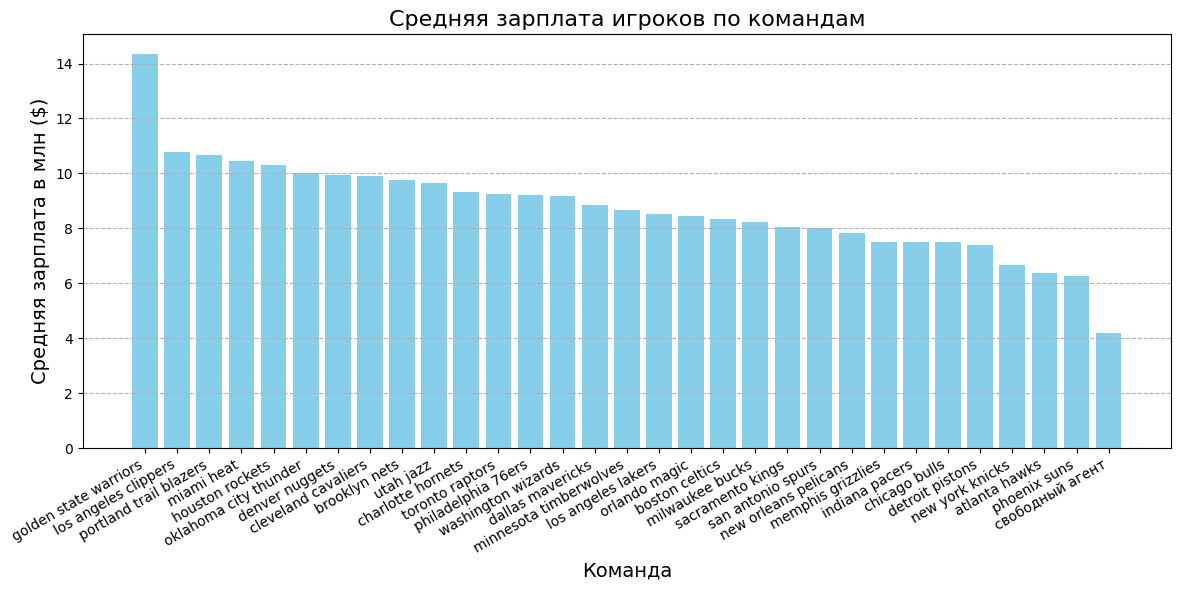

In [138]:
team_avg_salary = df.groupby('team')['salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
bars = plt.bar(team_avg_salary.index, team_avg_salary.values / 1_000_000, color='skyblue')

plt.title('Средняя зарплата игроков по командам', fontsize=16)
plt.xlabel('Команда', fontsize=14)
plt.ylabel('Средняя зарплата в млн ($)', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

#### Средний рейтинг игроков по странам

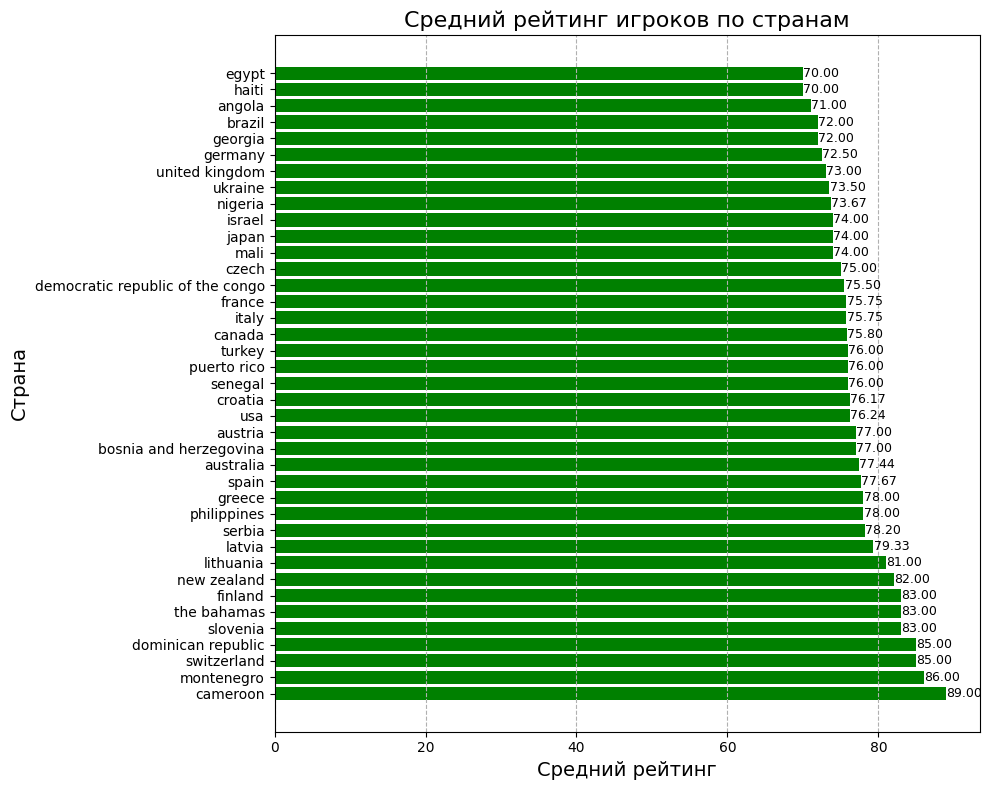

In [151]:
team_avg_rating = df.groupby('country')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
bars = plt.barh(team_avg_rating.index, team_avg_rating.values, color='green') 

plt.title('Средний рейтинг игроков по странам', fontsize=16)
plt.xlabel('Средний рейтинг', fontsize=14)
plt.ylabel('Страна', fontsize=14)
plt.grid(axis='x', linestyle='--')

for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

#### Средний рейтинг игроков по командам

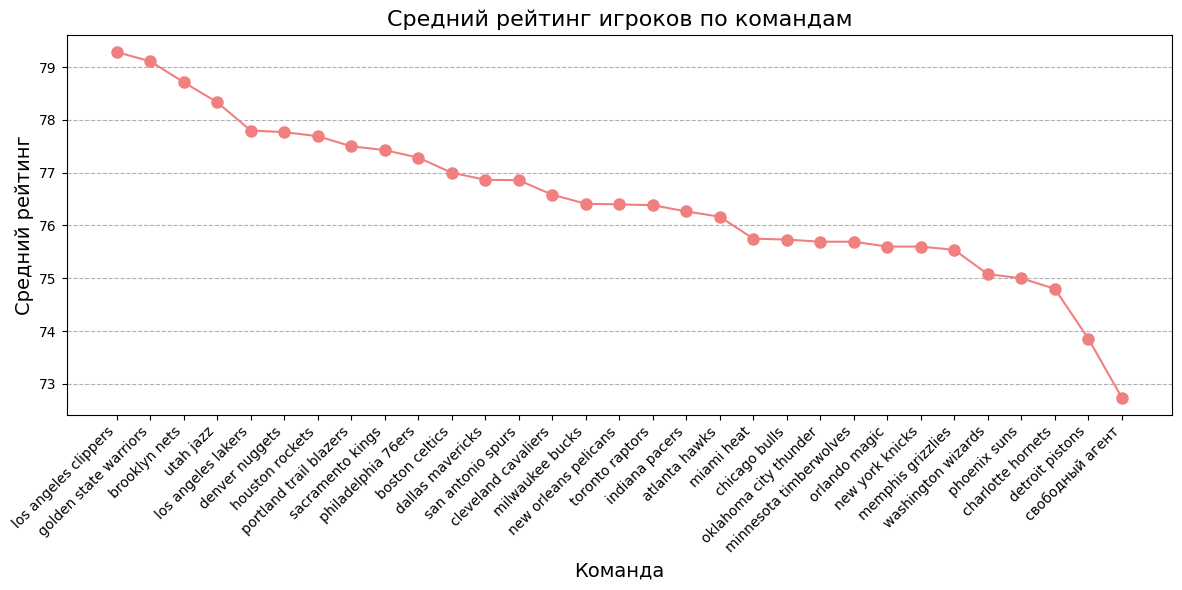

In [159]:
team_avg_rating = df.groupby('team')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))

plt.plot(team_avg_rating.index, team_avg_rating.values, marker='o', linestyle='-', color='lightcoral', markersize=8)

plt.title('Средний рейтинг игроков по командам', fontsize=16)
plt.xlabel('Команда', fontsize=14)
plt.ylabel('Средний рейтинг', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()


## 2. Диаграммы, библиотека Seaborn

#### Рейтинг зарплат по странам

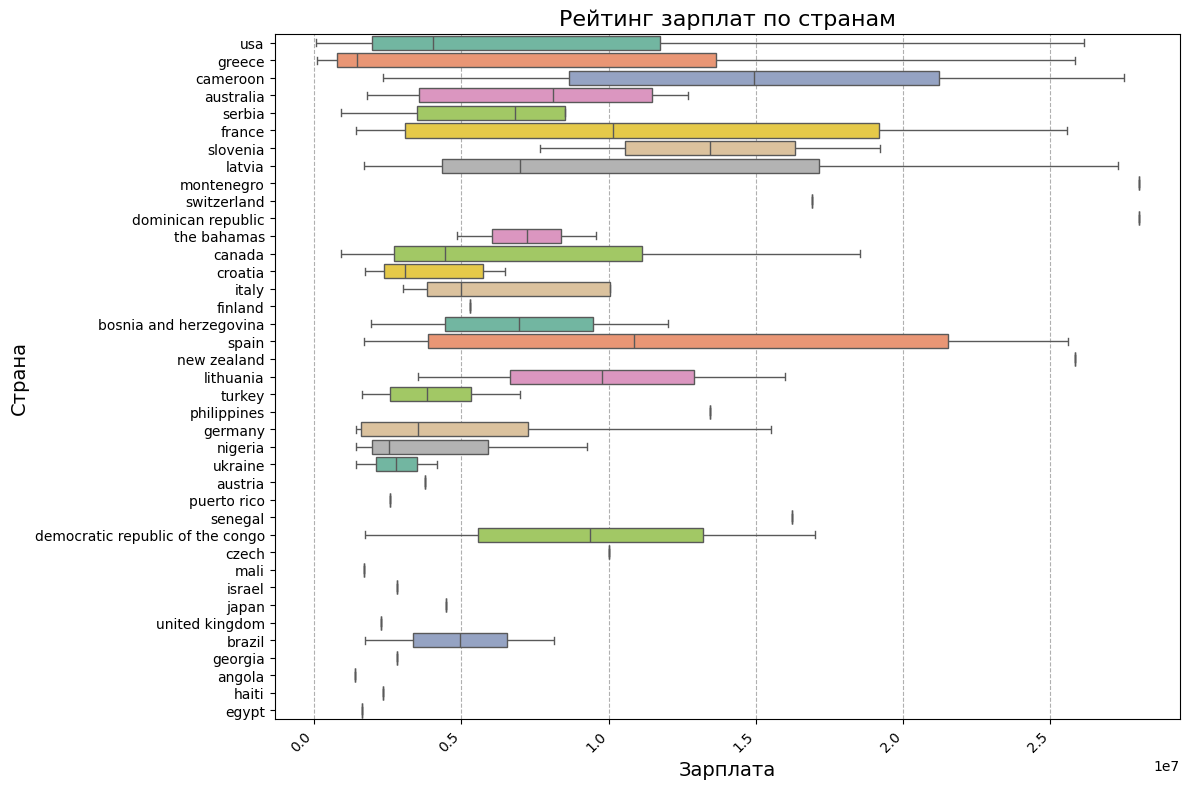

In [172]:
plt.figure(figsize=(12, 8))  
sns.boxplot(x='salary', y='country', data=df, palette='Set2', hue='country', showfliers=False, legend=False)

plt.title('Рейтинг зарплат по странам', fontsize=16)
plt.xlabel('Зарплата', fontsize=14)
plt.ylabel('Страна', fontsize=14)
plt.grid(axis='x', linestyle='--')

plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

#### Сравнение средних зарплат и рейтингов по командам

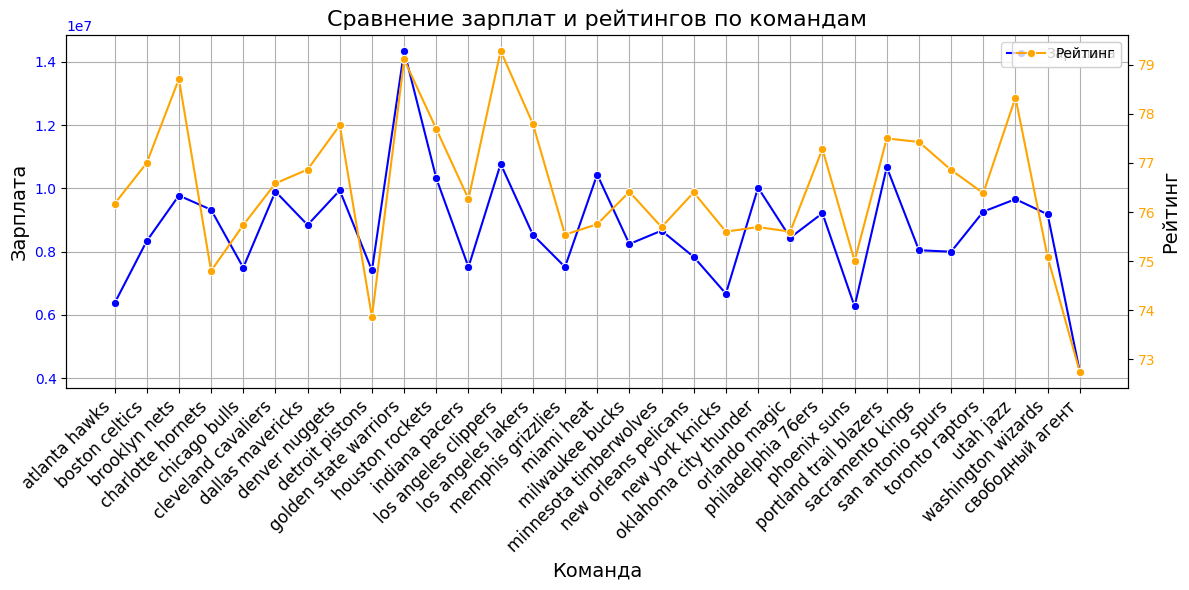

In [178]:
average_ratings = df.groupby('team').agg({'salary': 'mean', 'rating': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=average_ratings, x='team', y='salary', marker='o', label='Зарплата', color='blue', ax=ax1)
ax1.set_ylabel('Зарплата', fontsize=14)
ax1.set_xlabel('Команда', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45, ha='right', fontsize=12)

ax2 = ax1.twinx()  
sns.lineplot(data=average_ratings, x='team', y='rating', marker='o', label='Рейтинг', color='orange', ax=ax2)
ax2.set_ylabel('Рейтинг', fontsize=14)
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Сравнение зарплат и рейтингов по командам', fontsize=16)
ax1.grid()
plt.tight_layout()
plt.show()

## 3. "Портрет" типичного потребителя (вывод к разделу 3)


## 1. Демографические данные
- **Возраст**: 30-50 лет. Обычно это опытные профессионалы, работающие в сфере менеджмента.
- **Пол**: Мужчины и женщины.
- **Образование**: Высшее образование в области управления, экономики, спортивного менеджмента или смежных областях.

## 2. Социально-экономические характеристики
- **Доход**: Высокий уровень дохода, соответствующий их должности и ответственности.
- **Занятость**: Работа в спортивных командах, на управленческих или аналитических позициях.

## 3. Поведенческие характеристики
- **Увлечения**: Активно интересуются баскетболом, имеют глубокие знания о спортсменах, их карьере и статистике.
- **Решения о покупке**: Ориентируются на данные анализов, scouting reports и общие тренды в лиге, принимая решение о подписании контрактов с новыми игроками и пересмотре зарплат.

## 4. Заключение
Этот портрет типичного потребителя менеджеров команд НБА помогает понять их потребности и предпочтения в процессе поиска новых игроков и управления зарплатами.


# Общий вывод по проекту

Анализ данного датасета предоставляет ценную информацию о динамике лиги, позволяет выявить ключевые тренды и понять, какие факторы влияют на экономику команд. В условиях быстро меняющегося рынка баскетбольных талантов, знание статистики и характеристик игроков становится критическим для менеджеров команд, стремящихся создать сильные, конкурентоспособные ростеры. Данный датасет охватывает широкий спектр переменных, включая зарплаты, статистические показатели и позиции игроков, что позволяет глубже исследовать взаимосвязи этих факторов и делать более обоснованные выводы.

# Ниже представлены основные выводы

# Основные выводы

## Зарплаты
1. **Зависимость от рейтинга**:
   - Зарплаты игроков значительно зависят от их рейтинга и позиции на площадке.
2. **Рекордные контракты**:
   - Высокие контракты выделяются у звездных игроков, которые оказывают значительное влияние на успех команды.
3. **Молодые таланты**:
   - Молодые и неопытные игроки имеют контракты с низкими зарплатами, так как им нужно доказать свои игровые навыки. Однако среди них есть высокорейтинговые игроки, на которых стоит обратить внимание менеджерам.

## Тенденции в составах команд
1. **Atlanta Hawks**:
   - Эта команда акцентирует внимание на молодых игроках, занимая лидирующие позиции по соотношению рейтинг/цена.
2. **Golden State Warriors**:
   - Предпочитают опытных и звездных игроков, что приводит к высокой средней зарплате и высокому уровню рейтинга.
3. **Тактики**:
   - Первая стратегия ориентирована на будущее команды, вторая — на текущие результаты.

## Страны
1. **Разнообразие**:
   - Игроки в НБА представляют множество стран, что говорит о возможности попасть в лигу из любой страны.
2. **Средние рейтинги**:
   - Наивысший средний рейтинг среди стран принадлежит Камеруну, за ним следуют Черногория и Швейцария.
   - Наименьший рейтинг имеют Египет и Гаити.
3. **Глобальные таланты**:
   - В лиге много высокорейтинговых игроков не из США, например, Giannis Antetokounmpo (96, Греция), Joel Embiid (91, Камерун), Kyrie Irving (91, Австралия). Менеджерам стоит обратить внимание на другие страны в поисках кандидатов.

## Рейтинг
1. **Баланс команд**:
   - Команды в НБА достаточно сбалансированы по среднему рейтингу игроков, можно выделить лучших и худших.
2. **Лучшие команды**:
   - Golden State Warriors, Los Angeles Clippers, Brooklyn Nets.
3. **Худшие команды**:
   - Detroit Pistons, Phoenix Suns, Charlotte Hornets.
4. **Зарплаты и Рейтинг**:
   - Лучшие команды по зарплатам и рейтингам: Golden State Warriors, Los Angeles Clippers.
   - Худшие команды: Detroit Pistons, Phoenix Suns. Это подтверждает зависимость зарплаты от рейтинга.

## Игровые позиции
1. **Разыгрывающий (G)**:
   - На позиции разыгрывающего наибольшее количество игроков (169) с высокой конкуренцией.
2. **Форвард (F)**:
   - Позиция форварда включает 138 игроков, также с высокой конкурентностью.
3. **Центровой (C)**:
   - На позиции центрового только 48 игроков, что указывает на дефицит таких игроков в лиге.



# Рекомендации для менеджеров НБА

## 1. Анализ зарплат и рейтингов
- **Учитывайте**, что зарплаты игроков напрямую зависят от их рейтинга и позиций.  
  **Инвестирование** в игроков с высоким рейтингом может принести команде быстрый успех.

## 2. Поиск молодых талантов
- **Обратите внимание** на молодых игроков с высоким рейтингом и низкими зарплатами.  
  Подписывая такие контракты, можно получить будущих звезд по выгодным условиям.

## 3. Стратегия составления команд
- **Рассмотрите баланс** между молодыми и опытными игроками.  
  Молодежь может предложить перспективу и энергичность, тогда как опытные игроки обеспечивают стабильность и лидерство.

## 4. Разнообразие и уникальность
- **Используйте разнообразие** игроков из разных стран для формирования сбалансированной команды.  
  Игроки из других лиг могут принести освежающие идеи и подходы, которые могут улучшить стратегии игры.

## 5. Фокус на игровой позиции
- **Учитывая высокую конкуренцию** на позициях разыгрывающего и форварда, инвестируйте в уникальные навыки центровых игроков,  
  чтобы заполнить дефицит и создать сильную линию защиты и атаки.

---

Эти рекомендации, основанные на анализе данных и текущих трендах, помогут менеджерам НБА принимать более обоснованные решения и формировать успешные составы.